<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Statistics-and-EDA-in-R/blob/main/Taiwan_real_state_EDA_LM%2C_outliers_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
# Install
install.packages("openintro")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘airports’, ‘cherryblossom’, ‘usdata’




In [46]:
# Install
install.packages("ggfortify")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’




In [2]:
install.packages("fst")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# Load
library(devtools)
library(dplyr)
library(ggplot2)
library(openintro)
library(broom)
library('fst')
library('ggfortify')

Loading required package: usethis


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: airports

Loading required package: cherryblossom

Loading required package: usdata



# Import Taiwan real state dataset

https://assets.datacamp.com/production/repositories/5759/datasets/bbfad1cf04348017143fef58b0b0f3f9b8b5bf99/taiwan_real_estate.fst

In [5]:
# Saved locally 
taiwan_real_estate = read.fst("/content/taiwan_real_estate.fst")
# Print head and feature value types

head(taiwan_real_estate)
str(taiwan_real_estate)

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
,<dbl>,<dbl>,<ord>,<dbl>
1,84.87882,10,30 to 45,11.467474
2,306.59470,9,15 to 30,12.768533
3,561.98450,5,0 to 15,14.311649
4,561.98450,5,0 to 15,16.580938
5,390.56840,5,0 to 15,13.040847
6,2175.03000,3,0 to 15,9.712557


'data.frame':	414 obs. of  4 variables:
 $ dist_to_mrt_m  : num  84.9 306.6 562 562 390.6 ...
 $ n_convenience  : num  10 9 5 5 5 3 7 6 1 3 ...
 $ house_age_years: Ord.factor w/ 3 levels "0 to 15"<"15 to 30"<..: 3 2 1 1 1 1 3 2 3 2 ...
 $ price_twd_msq  : num  11.5 12.8 14.3 16.6 13 ...


# n_convenience vs. price_twd_msq

`geom_smooth()` using formula 'y ~ x'



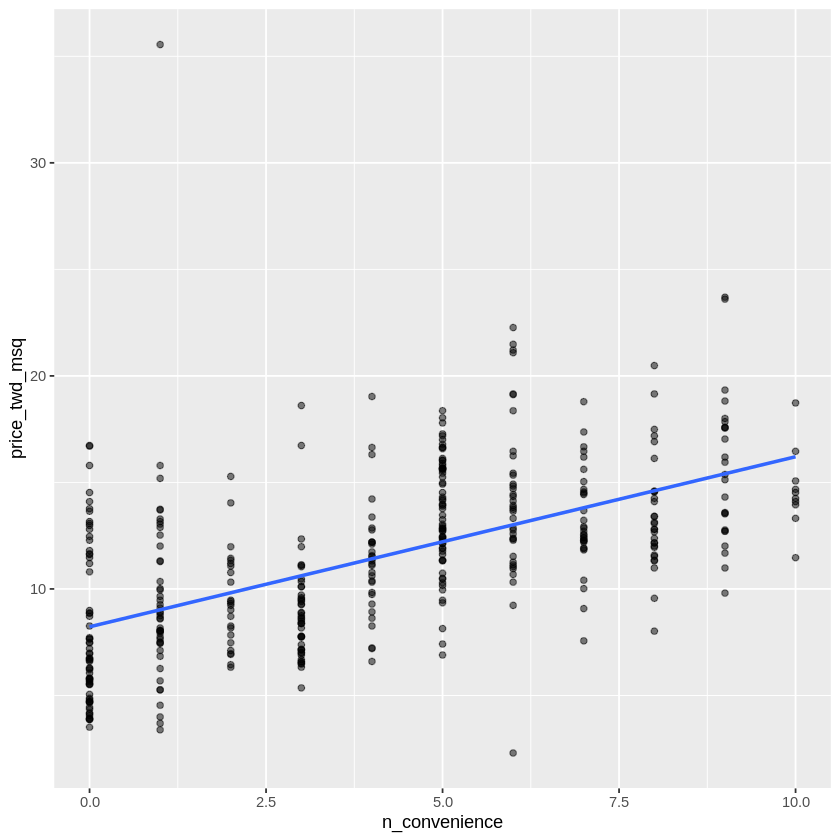

In [6]:
# Scatter plot of n_convenience vs. price_twd_msq
ggplot(taiwan_real_estate, aes(n_convenience, price_twd_msq)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE)

In [7]:
# Run a linear regression of price_twd_msq vs. n_convenience
lm_price_convenience = lm(price_twd_msq ~ n_convenience, data = taiwan_real_estate)

summary(lm_price_convenience)


Call:
lm(formula = price_twd_msq ~ n_convenience, data = taiwan_real_estate)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.7132  -2.2213  -0.5409   1.8105  26.5299 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    8.22424    0.28500   28.86   <2e-16 ***
n_convenience  0.79808    0.05653   14.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.384 on 412 degrees of freedom
Multiple R-squared:  0.326,	Adjusted R-squared:  0.3244 
F-statistic: 199.3 on 1 and 412 DF,  p-value: < 2.2e-16


## house_age_years vs. price_twd_msq

### Boxplot y vs categorical and summary statistics

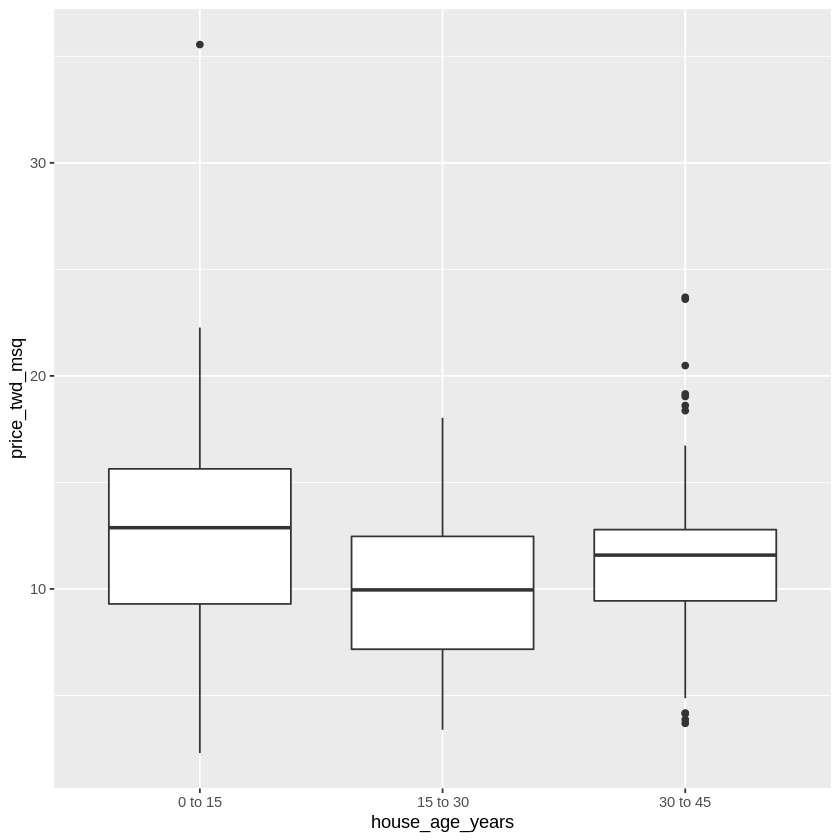

In [8]:
# Scatter plot of house_age_years vs. price_twd_msq
ggplot(taiwan_real_estate, aes(house_age_years, price_twd_msq)) +
  geom_boxplot() 

Seems new houses are the most expensive on average and the ones from 15 to 30 years seems to be the cheapest (on avg).

It doesn't now seem linear.

In [9]:
# Boxplots show different medians for each category let's see the exact value for the statistical summary
taiwan_real_estate %>%
  group_by(house_age_years) %>%
  summarize(median = median(price_twd_msq), mean = mean(price_twd_msq))


,house_age_years,median,mean
,<ord>,<dbl>,<dbl>
1,0 to 15,12.874433,12.637471
2,15 to 30,9.954614,9.876743
3,30 to 45,11.588502,11.393264


### Histograms

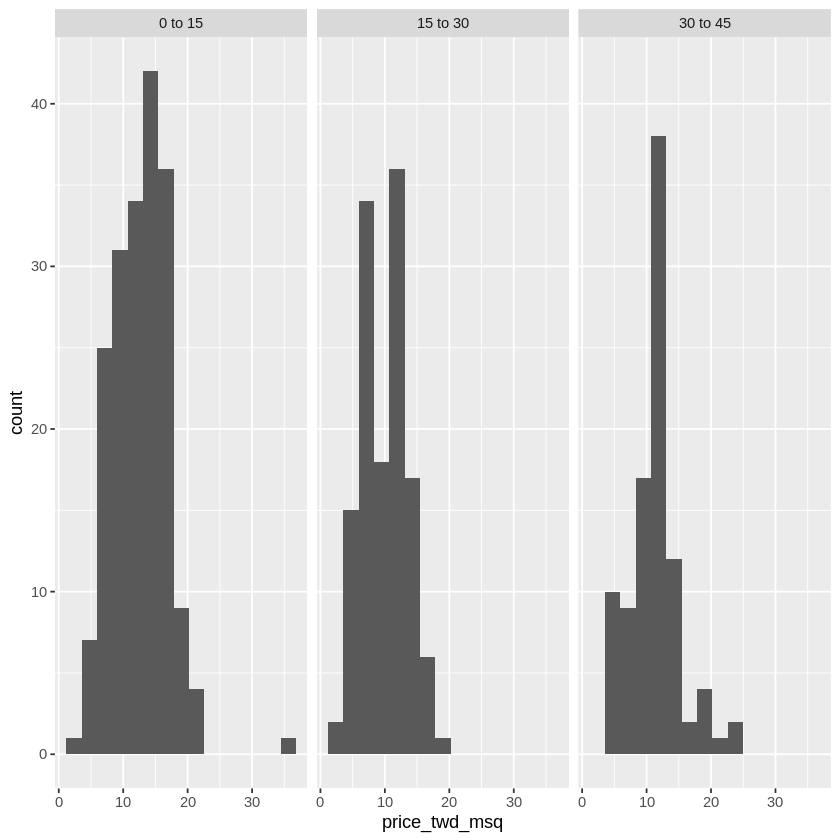

In [10]:
# Histogram plot of house_age_years vs. price_twd_msq
ggplot(taiwan_real_estate, aes(price_twd_msq)) +
  geom_histogram(bins=15)  +
  facet_wrap(taiwan_real_estate$house_age_years)

# dist_to_mrt_m vs. price_twd_msq

`geom_smooth()` using formula 'y ~ x'



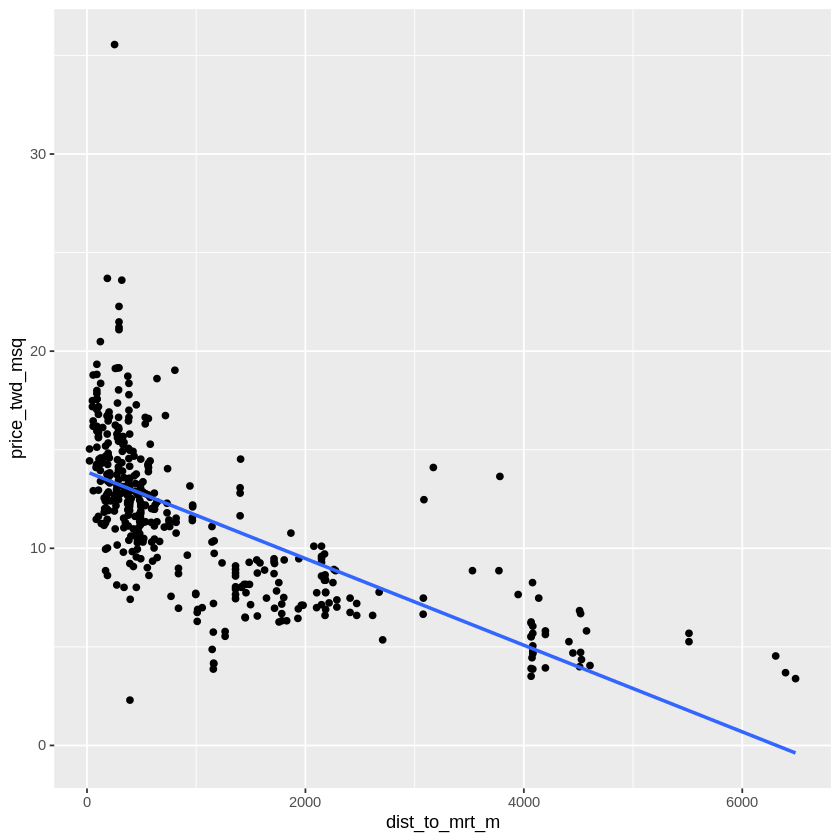

In [11]:
# Scatter plot of dist_to_mrt_m vs. price_twd_msq
ggplot(taiwan_real_estate, aes(dist_to_mrt_m, price_twd_msq)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)

## Transforming the explanatory variable

If there is no straight line relationship between the response variable and the explanatory variable, it is sometimes possible to create one by transforming one or both of the variables. Here, you'll look at transforming the explanatory variable.

`geom_smooth()` using formula 'y ~ x'



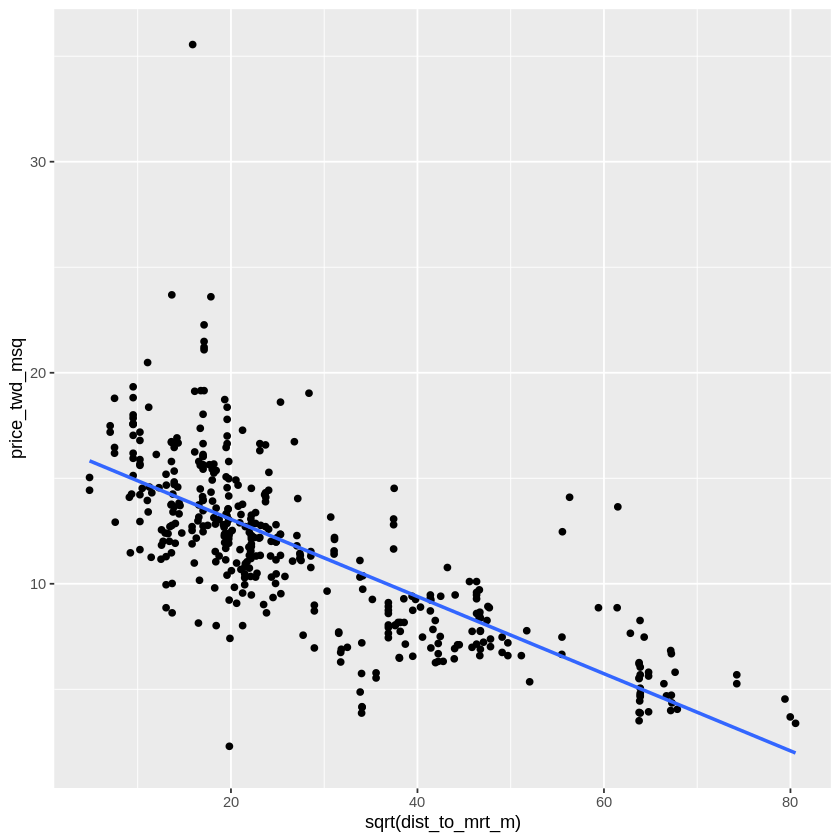

In [12]:
# Scatter plot transforming square root.
ggplot(taiwan_real_estate, aes(sqrt(dist_to_mrt_m), price_twd_msq)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)

### Creating linear regression 

In [41]:
# Run a linear regression of price_twd_msq vs. 
# square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist <- lm(price_twd_msq ~ sqrt(dist_to_mrt_m), data = taiwan_real_estate)

# See the result
mdl_price_vs_dist


Call:
lm(formula = price_twd_msq ~ sqrt(dist_to_mrt_m), data = taiwan_real_estate)

Coefficients:
        (Intercept)  sqrt(dist_to_mrt_m)  
            16.7098              -0.1828  


### Prediction

In [16]:
# Use this explanatory data
explanatory_data <- tibble(dist_to_mrt_m = seq(0, 80, 10) ^ 2)

explanatory_data

dist_to_mrt_m
<dbl>
0
100
400
900
1600
2500
3600
4900
6400


In [18]:
# Predict inside data frame
prediction_data <- explanatory_data %>% 
  mutate(price_twd_msq = predict(mdl_price_vs_dist, explanatory_data))

prediction_data

dist_to_mrt_m,price_twd_msq
<dbl>,<dbl>
0,16.709799
100,14.881370
400,13.052942
900,11.224513
1600,9.396085
2500,7.567656
3600,5.739227
4900,3.910799
6400,2.082370


### Plot predictions inside scatter plot

`geom_smooth()` using formula 'y ~ x'



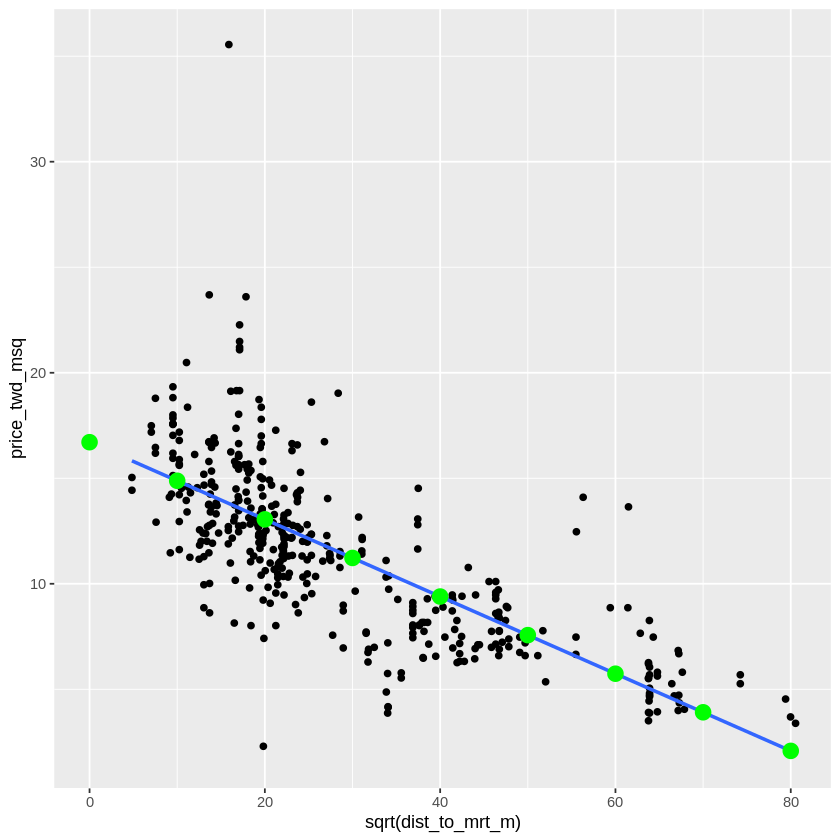

In [23]:
# Scatter plot
ggplot(taiwan_real_estate, aes(sqrt(dist_to_mrt_m), price_twd_msq)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  # Add points from prediction_data, colored green, size 5
  geom_point(data = prediction_data, color = "green", size = 4)

### If instead of square I use exponential


I need to use I(variable ^ 0.50)

In [53]:
# lm with exponential, using I()
mdl_price_vs_distsqrd <- lm(price_twd_msq ~ I(dist_to_mrt_m ^ 0.50), data = taiwan_real_estate)

# See summary of model
summary(mdl_price_vs_dist)



Call:
lm(formula = price_twd_msq ~ sqrt(dist_to_mrt_m), data = taiwan_real_estate)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.7843  -1.5410  -0.2594   1.2294  21.7483 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         16.709799   0.277741   60.16   <2e-16 ***
sqrt(dist_to_mrt_m) -0.182843   0.008436  -21.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.818 on 412 degrees of freedom
Multiple R-squared:  0.5327,	Adjusted R-squared:  0.5316 
F-statistic: 469.7 on 1 and 412 DF,  p-value: < 2.2e-16


## R2 in lm and RSE(sigma)

In [33]:
# Pull R squared with Glance(Broom package)
glance(mdl_price_vs_dist) %>%
  pull(r.squared)

[1] 0.5327441

In [34]:
# Pull RSE (in broom is called sigma)
RSE = glance(mdl_price_vs_dist) %>%
  pull(sigma)

RSE

[1] 2.817594

RSE means the typical difference between observed price and predicted price is 2.817

## Linear model is a good fit? autoplot()

1- residual vs. fitted values

2- Q-Q Plot

3- scale-location

With this plots we can check how normal is the distribution of residuals?

### Drawing diagnostic plots on mdl_price_vs_conv

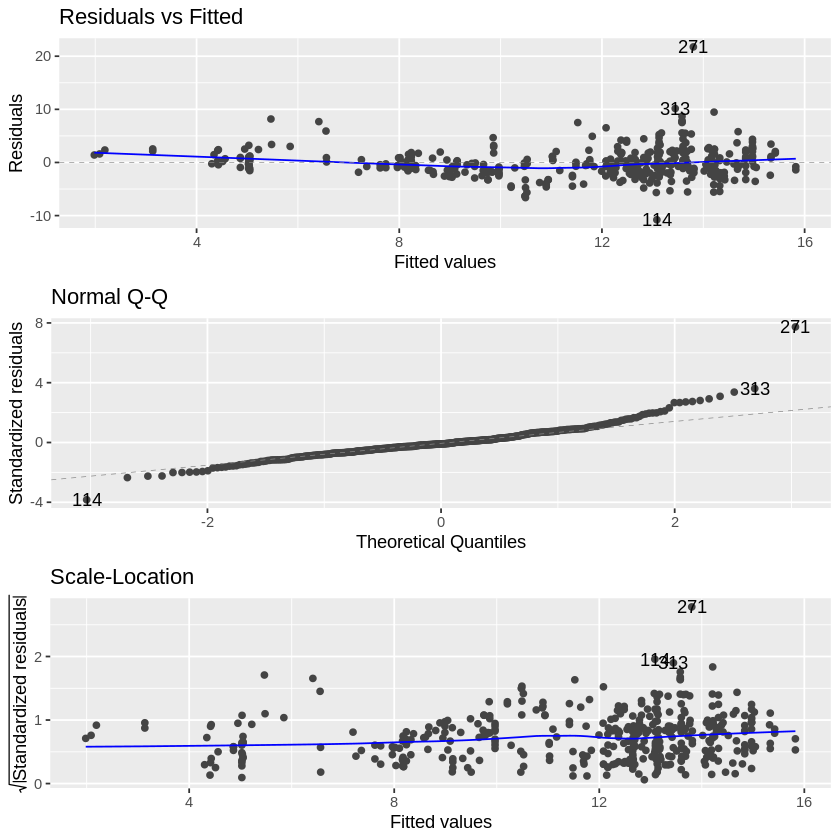

In [52]:
# Plot the three diagnostics for mdl_price_vs_conv
autoplot(mdl_price_vs_dist, which = 1:3, nrow = 3, ncol = 1)

### Drawing diagnostic plots on mdl_price_vs_conv

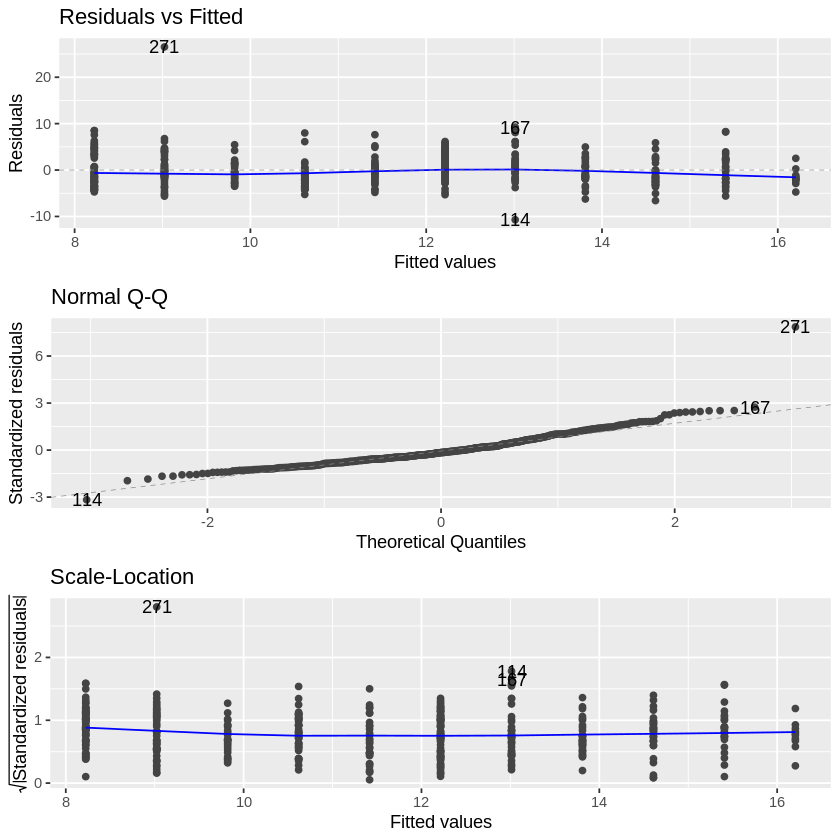

In [50]:
mdl_price_vs_conv = lm(formula = price_twd_msq ~ n_convenience, data = taiwan_real_estate)


autoplot(mdl_price_vs_conv, which = 1:3, nrow = 3, ncol = 1)

## Outliers, leverage, and influence


Leverage is a measure of how extreme the explanatory variable values are.

We calculate leverage from a model object. In this case Lm

### Leverage

In the case of simple linear regression, where there is only one explanatory value, this typically means values with a very high or very low explanatory value.

**Highly leveraged points are the ones with explanatory variables that are furthest away from the others.**

In [66]:
# .hat is the value of leverage
augment(mdl_price_vs_dist)[c('price_twd_msq','.hat')] %>%
  arrange(desc(.hat)) %>%
  head()

price_twd_msq,.hat
<dbl>,<dbl>
3.388805,0.02666524
3.691377,0.02613525
4.538578,0.02561660
5.688351,0.02114202
5.264750,0.02114202
4.054463,0.01628058


### Influence

Measures how the model would change if you left the observation out of the dataset when modeling. 

Cook's distance is the most common measure of influence

Observations with predictions far away from the trend line have high influence, because they have large residuals and are far away from other observations.

In [65]:
# .hat is the value of leverage
influence_df = augment(mdl_price_vs_dist)[c('price_twd_msq','.cooksd')] %>%
  arrange(desc(.cooksd))

head(influence_df)

price_twd_msq,.cooksd
<dbl>,<dbl>
35.552194,0.11554872
13.645991,0.05244008
14.099849,0.03538436
23.691377,0.02512289
2.299546,0.02281295
23.600605,0.02249375


### Plot leverage and influence with autoplot

Leverage and influence are important concepts for determining your model is overly affected by some unusual data points.

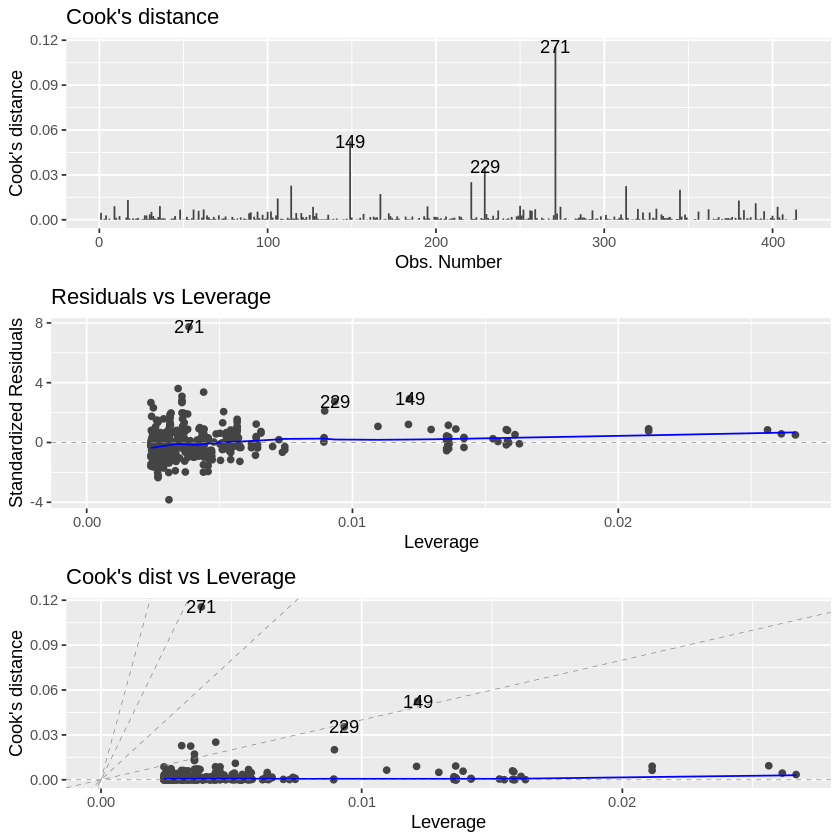

In [67]:
autoplot(mdl_price_vs_dist, which = 4:6, nrow = 3, ncol = 1)